# Analysis : Best online market to advertise an E-Learning product

Our company offers online-courses. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. The company wants to promote its products and is willing to invest some money in advertisement. In this project we are going to identify which is the best market to advertise our new offerings. 

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis. The survey data is publicly available in the [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [25]:
# reading the data
import pandas as pd

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc_data = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning

pd.options.display.max_columns = 150 # to avoid truncated display
fcc_data.head() # to analyse the data structure
print(fcc_data.shape) # to understand the number of rows and columns

(18175, 136)


As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [26]:
# create a distribution based on the interested Job Roles
role_distribution = fcc_data['JobRoleInterest'].value_counts(normalize=True)*100
print(role_distribution.head(10))

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64


We created a distribution based on the interested Job Role and plotted a bar graph for the first 10 preferred Job Roles.
From the above distribution we can come to following conclusions:
- Most preferred Job Role is as Web Developer (Full-Stack, Front-End, Back-End)
- Many are interested in other domains aswell
- Some are interested in multiple Roles

In [27]:
# drop all the rows where participants did'nt answer what role they are interested in
fcc_data_good = fcc_data[fcc_data['JobRoleInterest'].notnull()].copy()

interest_roles = fcc_data_good['JobRoleInterest'].str.split(',')
role_count = interest_roles.apply(lambda x : len(x))
role_count_sorted = role_count.value_counts(normalize=True).sort_index()
print(round(role_count_sorted*100, 2))

1     31.65
2     10.88
3     15.89
4     15.22
5     12.04
6      6.72
7      3.86
8      1.76
9      0.99
10     0.47
11     0.19
12     0.30
13     0.03
Name: JobRoleInterest, dtype: float64


From the above analysis we can conclude that:
- 31.65% are interested in single role
- 68.35% are interested in multiple roles

Since our focus is on Web and Mobile development, let's find our how many are interested in these two roles.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


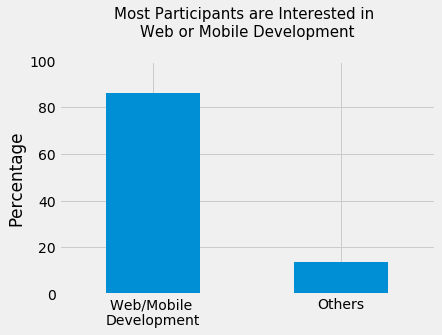

In [28]:
# frequeny table
web_or_mobile = fcc_data_good['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

# plot above frequeny table
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.xticks(range(2), ['Web/Mobile \nDevelopment', 'Others'], rotation=0)
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.title('Most Participants are Interested in \nWeb or Mobile Development', fontsize=15, y = 1.08) # y pads the title upward
plt.show()

The graph shows that majority of the people (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- How much money new coders are willing to spend on learning.

# New Coders - Locations
Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [29]:
# create an absolute frequency distribution for location
country_live_abs = fcc_data_good['CountryLive'].value_counts()

# create an relative frequency distribution for location
country_live_rel = fcc_data_good['CountryLive'].value_counts(normalize=True)*100

# create a dataframe with absolute and relative distribution of the country
country_distribution = pd.DataFrame({'Absolute Distribution':country_live_abs, 'Relative Distribution' : country_live_rel})
print(country_distribution.head(10))

                          Absolute Distribution  Relative Distribution
United States of America                   3125              45.700497
India                                       528               7.721556
United Kingdom                              315               4.606610
Canada                                      260               3.802281
Poland                                      131               1.915765
Brazil                                      129               1.886517
Germany                                     125               1.828020
Australia                                   112               1.637906
Russia                                      102               1.491664
Ukraine                                      89               1.301550


From the above analysis we can clearly say USA and India are the top two locations. But UK and Canda are not far behind.

# Spending Money for Learning

Our company sells subscriptions at a price of $59 per month, for this reason we are interested in finding out how much money each student spends per month.

We have decided to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [30]:
# to replace value 0 with 1 in the column 'MonthsProgramming' 
fcc_data_good['MonthsProgramming'] = fcc_data_good['MonthsProgramming'].replace(0,1)

# create new column which contains details of money spent per month by the participants
fcc_data_good['MoneySpentPerMonth'] = fcc_data_good['MoneyForLearning']/fcc_data_good['MonthsProgramming']
fcc_data_good.head()

# retain only the rows that don't have a null value for the new column 'MoneySpentPerMonth'.
fcc_data_good = fcc_data_good[fcc_data_good['MoneySpentPerMonth'].notnull()]

# retain only the rows that don't have a null value for the 'CountyLive' column
fcc_data_good = fcc_data_good[fcc_data_good['CountryLive'].notnull()]

# mean sum of money spent by students each month
fcc_mean = fcc_data_good.groupby(['CountryLive']).mean()
print('Mean of money spend per month' + '\n' + '-'*29)
print(fcc_mean['MoneySpentPerMonth'][['United States of America', 'India', 
                                      'United Kingdom', 'Canada']])

Mean of money spend per month
-----------------------------
CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64


In [31]:
# median sum of money spent by students each month
fcc_median = fcc_data_good.groupby(['CountryLive']).median()
print('Median of money spend per month' + '\n' + '-'*31)
print(fcc_median['MoneySpentPerMonth'][['United States of America', 'India', 
                                        'United Kingdom', 'Canada']])

Median of money spend per month
-------------------------------
CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: MoneySpentPerMonth, dtype: float64


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_PPP_per_capita#Lists_of_countries_and_dependencies)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

# Identify the Outliers

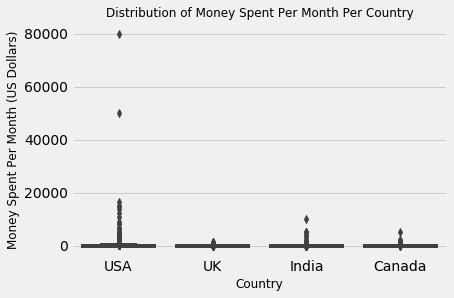

In [32]:
# isolate countries of interest
four_countries = fcc_data_good[fcc_data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# generate box plot to identify the outliers
import seaborn as sns

sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent Per Month (US Dollars)', fontsize=12)
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

From the above plot we can see that USA have a couple of outliers are USD 50000 and USD 80000. 
Same way for India, USD 10000 can be considered as an outlier. But this is not a big oulier like the ones in USA.
Now we can find out the mean after removing these big outliers.

In [33]:
# remove big outliers from the data
fcc_data_good = fcc_data_good[fcc_data_good['MoneySpentPerMonth']<20000]

# re-calculate mean after removing the outlier
fcc_mean = fcc_data_good.groupby('CountryLive').mean()
print('Mean of money spent per month' + '\n' + '-'*29)
print(fcc_mean['MoneySpentPerMonth'][['United States of America', 'India',
                                     'United Kingdom', 'Canada']])

Mean of money spent per month
-----------------------------
CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneySpentPerMonth, dtype: float64


# Identify the outlier continued...

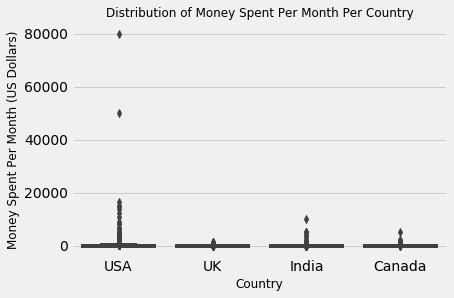

In [34]:
# generate box plot to identify the outliers
sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent Per Month (US Dollars)', fontsize=12)
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

From the above box plot we can observe some extreme outliers for USA, India and Canada. This time we will remove the outliers from each coutry separately.

# Evaluation and Removing outliers for USA

For USA we can consider $6000 as an outlier and now try to analyse whether these big expenses with learning are justified or not.

In [35]:
# evaluate the outliers for USA
usa_outlier = four_countries[(four_countries['CountryLive']=='United States of America')
                             & (four_countries['MoneySpentPerMonth']>6000)]
print(usa_outlier)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
2478   38.0               1.0             0.0                1.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
14024  45.0               0.0             NaN                NaN   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  

When analysing the above table we can understand that out of 11 participants, 5 have attended bootcamps (column 'AttendedBootcamp'). Since bootcamps are quite expensive, this is justifiable. From remaining 7 it is not yet clear why they had to spent more money. So to reduce the outliers, we will remove participants based on the below conditions:
- those who did not attend Bootcamps (column 'AttendedBootcamp')  
- those who spent 3 or less months for programming (columns 'MonthsProgramming')

In [36]:
# evaluate the outliers for USA continued...

# remove those particpants who did not attend bootcamp
no_bootcamp = four_countries[(four_countries['CountryLive']=='United States of America')
                             & (four_countries['MoneySpentPerMonth']>6000)
                             & (four_countries['AttendedBootcamp']==0)]  

four_countries = four_countries.drop(no_bootcamp.index)
                             
# remove those participants who spent 3 or less months for programming 
three_or_less = four_countries[(four_countries['CountryLive']=='United States of America')
                             & (four_countries['MoneySpentPerMonth']>6000)
                             & (four_countries['MonthsProgramming']<=3)]  

print(three_or_less)
four_countries = four_countries.drop(three_or_less.index)

       Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718   26.0               1.0             0.0                0.0   
1222  32.0               1.0             0.0                0.0   
2478  38.0               1.0             0.0                1.0   
3184  34.0               1.0             1.0                0.0   
6805  46.0               1.0             1.0                1.0   
7505  26.0               1.0             0.0                1.0   
9778  33.0               1.0             0.0                1.0   

                                BootcampName  BootcampRecommend  \
718   The Coding Boot Camp at UCLA Extension                1.0   
1222                           The Iron Yard                1.0   
2478                                     NaN                1.0   
3184                          We Can Code IT                1.0   
6805                                Sabio.la                0.0   
7505                                  Codeup                0

# Evaluation and Removing outliers for India
For India amount spent above $2500 can be considered as outlier.
We will now analyse these cases and see whether these big expenses with learning are justified or not.

In [37]:
# evaluate the outliers for India
india_outlier = four_countries[(four_countries['CountryLive']=='India') 
                               & (four_countries['MoneySpentPerMonth']>2500)]
print(india_outlier)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more 

As we can see that none of those participants attended Bootcamps. There is a possibility they might have misunderstood the question regarding the money spent for programming as to money spent in Universities as all these participants hold Bachelor's degree. With this assumption it is better to remove these outliers from our analysis.

In [38]:
# remove the outlies for India
four_countries = four_countries.drop(india_outlier.index)

# Evaluation and Removing outliers for Canada

For Canada, amount spent above $2500 can be considered as an outlier. So we will analyse these cases.

In [39]:
# evaluate the outliers for Canada
canada_outlier = four_countries[(four_countries['CountryLive']=='Canada')
                               & (four_countries['MoneySpentPerMonth']>2500)]
print(canada_outlier)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
13659                   1.0                   NaN           1.0   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
13659               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
13659              1.0                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
13659                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
13659                    NaN                 NaN              

Like for USA, here also we have a participant who spent more because the participant has taken part in bootcamp. Also the number of months spend for programming is 2. So we can remove this case as well.

In [40]:
# remove outliers for Canada
four_countries = four_countries.drop(canada_outlier.index)

Now let us calulate the mean after removing all the possible outliers.

In [41]:
# re-calculate mean after removing the outlier
fcc_mean = four_countries.groupby('CountryLive').mean()
print('Mean of money spend per month' + '\n' + '-'*31)
print(fcc_mean['MoneySpentPerMonth'])

Mean of money spend per month
-------------------------------
CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneySpentPerMonth, dtype: float64


Generating a new boxplot after removing all the possible outliers

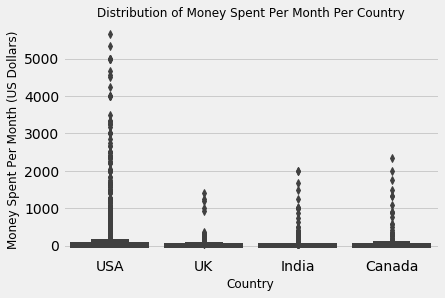

In [42]:
# generating boxplot after removing all the possible outliers
sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data=four_countries)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Money Spent Per Month (US Dollars)', fontsize=12)
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.title('Distribution of Money Spent Per Month Per Country', fontsize=12)
plt.show()

# Choosing the best market 1

From the above analysis we can strongly say that USA is our first choice of market to advertise. With lot of coders and average money spent per month well above our rate, makes USA as the best option. 

We can also consider a second market from the other three. UK can be ruled out since the average money spent per month is below our offering.

To choose among India and Canada, we need to dig little bit more into the data.

To do so, we can consider age of the coders as a parameter. We can try to analyse which market among these two countries have more youngsters. Age is considered as a parameter because youngsters with the possibility of finding jobs faster would be more willing to spend for the online courses. And targetting country with more younsters could be a better idea.

In [43]:
# isolate countries of interest
two_countries = fcc_data_good[(fcc_data_good['CountryLive']=='India')|
                             (fcc_data_good['CountryLive']=='Canada')]
print(two_countries)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
52     21.0               0.0             NaN                NaN          NaN   
55     17.0               0.0             NaN                NaN          NaN   
58     21.0               0.0             NaN                NaN          NaN   
64     20.0               0.0             NaN                NaN          NaN   
89     17.0               0.0             NaN                NaN          NaN   
...     ...               ...             ...                ...          ...   
18006  34.0               0.0             NaN                NaN          NaN   
18041   0.0               0.0             NaN                NaN          NaN   
18107  35.0               0.0             NaN                NaN          NaN   
18111  30.0               0.0             NaN                NaN          NaN   
18156  29.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  C

First we will remove all the rows where participants have not mentioned their age.

In [44]:
# remove rows where age is a null value
two_countries = two_countries[two_countries['Age'].notnull()]
print(two_countries)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
52     21.0               0.0             NaN                NaN          NaN   
55     17.0               0.0             NaN                NaN          NaN   
58     21.0               0.0             NaN                NaN          NaN   
64     20.0               0.0             NaN                NaN          NaN   
89     17.0               0.0             NaN                NaN          NaN   
...     ...               ...             ...                ...          ...   
18006  34.0               0.0             NaN                NaN          NaN   
18041   0.0               0.0             NaN                NaN          NaN   
18107  35.0               0.0             NaN                NaN          NaN   
18111  30.0               0.0             NaN                NaN          NaN   
18156  29.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  C

To make our analysis easier we need to clasify the age as below:
- 35yrs and below as 'Youngster'
- above 35yrs as 'Older'

To achieve this, we would need to create a function. And using this function, we would then create a new column 'AgeCategory'.

In [45]:
# function to classify age
def age_classifier(age):
    if age <=35:
        return 'Youngster'
    else:
        return 'Older'

two_countries['AgeCategory'] = two_countries['Age'].apply(age_classifier)

print(two_countries)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
52     21.0               0.0             NaN                NaN          NaN   
55     17.0               0.0             NaN                NaN          NaN   
58     21.0               0.0             NaN                NaN          NaN   
64     20.0               0.0             NaN                NaN          NaN   
89     17.0               0.0             NaN                NaN          NaN   
...     ...               ...             ...                ...          ...   
18006  34.0               0.0             NaN                NaN          NaN   
18041   0.0               0.0             NaN                NaN          NaN   
18107  35.0               0.0             NaN                NaN          NaN   
18111  30.0               0.0             NaN                NaN          NaN   
18156  29.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  C

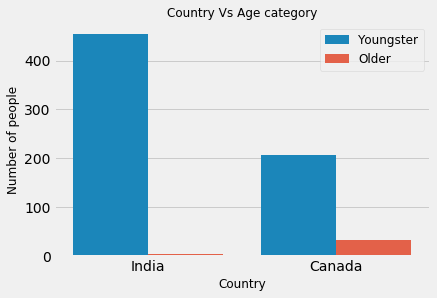

In [46]:
# generate graph to understand age catagory
sns.countplot(x='CountryLive', hue='AgeCategory', data=two_countries)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of people', fontsize=12)
plt.title('Country Vs Age category', fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Choosing the best market 2

From the above graph it is evident that India has more than double the number of youngsters when compared with Canada. With this we can say India has the advantage as our second market.

Before we jumb to any conclusion, we can share this analysis with our marketing team who in turn can use their domain knowledge and decide on this. They may want to do some extra survey to decide between India and Canada. Or they even may prefer to market in both the coutries.

# Conclusion

After our detailed analyses in our aim to identify the best two markets to advertise our offerings, we can come to a conclusion that USA is the best market. 

For the second market, we had to choose between India and Canada. To do this we used age as a parameter and understood that India could be a potential market. We decided to send our analysis to marketing team and use their experience to make the final call.